<a href="https://colab.research.google.com/github/Mahiyan-Khan-Abir/Research-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Admission in the University/adm_data.csv")
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [3]:
df1 = pd.DataFrame(df)
df1.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [4]:
#Correlation
import matplotlib.pyplot as plt
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [5]:
x= df.iloc[:, [1,2,6]].values
y= df.iloc[:,7].values
#print(x)
#print(y)

**Split and Scatter**

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**K-Neighbors Classifier (KNN)**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KN = KNeighborsClassifier(n_neighbors = 8)
classifier_KN.fit(x_train, y_train)

y_pred_KN = classifier_KN.predict(x_test)

Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_KN = confusion_matrix(y_test, y_pred_KN)
print("Confusion Matrix:")
print(CM_KN)
CR_KN1 = classification_report(y_test, y_pred_KN)
print("Classification Report:",)
print (CR_KN1)
CR_KN2 = accuracy_score(y_test,y_pred_KN)
print("Accuracy:",CR_KN2*100,'%')

Confusion Matrix:
[[39 10]
 [10 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        49
           1       0.80      0.80      0.80        51

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

Accuracy: 80.0 %


**SVM**

In [33]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score
 

skf = StratifiedKFold(n_splits=10)
clf_SVC = svm.SVC(kernel='linear', C=1)

#Support vector classifier
from sklearn.svm import SVC  
classifier_SVC = SVC(kernel='linear', random_state=0)  
classifier_SVC.fit(x_train, y_train)

#Predicting the test set result  
y_pred_SVC = classifier_SVC.predict(x_test)  


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_SVC = confusion_matrix(y_test, y_pred_SVC)
print("Confusion Matrix:")
print(CM_SVC)
CR_SVC1 = classification_report(y_test, y_pred_SVC)
print("Classification Report:",)
print (CR_SVC1)
CR_SVC2 = accuracy_score(y_test,y_pred_SVC)
print("Accuracy:",CR_SVC2*100,'%')

Confusion Matrix:
[[37 12]
 [ 9 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        49
           1       0.78      0.82      0.80        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100

Accuracy: 79.0 %


Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)
y_pred_DTC = tree.predict(x_test)

Accuracy: 76.00%


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Confusion Matrix:")
print(CM_DTC)
CR_DTC1 = classification_report(y_test, y_pred_DTC)
print("Classification Report:",)
print (CR_DTC1)
CR_DTC2 = accuracy_score(y_test,y_pred_DTC)
print("Accuracy:",CR_DTC2*100,'%')

Confusion Matrix:
[[39 10]
 [14 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.76        49
           1       0.79      0.73      0.76        51

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100

Accuracy: 76.0 %


Ensemble method

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a voting classifier from the individual classifiers
ensemble = VotingClassifier(estimators=[ ('knn', classifier_KN), ('svm', clf_SVC), ('tree', tree)], voting='hard')

# Train the voting classifier on the training data
ensemble.fit(x_train, y_train)

# Use the trained voting classifier to make predictions on the test data
y_pred_EM = ensemble.predict(x_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_EM = confusion_matrix(y_test, y_pred_EM)
print("Confusion Matrix:")
print(CM_EM)
CR_EM1 = classification_report(y_test, y_pred_EM)
print("Classification Report:",)
print (CR_EM1)
CR_EM2 = accuracy_score(y_test,y_pred_EM)
print("Accuracy:",CR_EM2*100,'%')

Confusion Matrix:
[[38 11]
 [10 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        49
           1       0.79      0.80      0.80        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100

Accuracy: 79.0 %


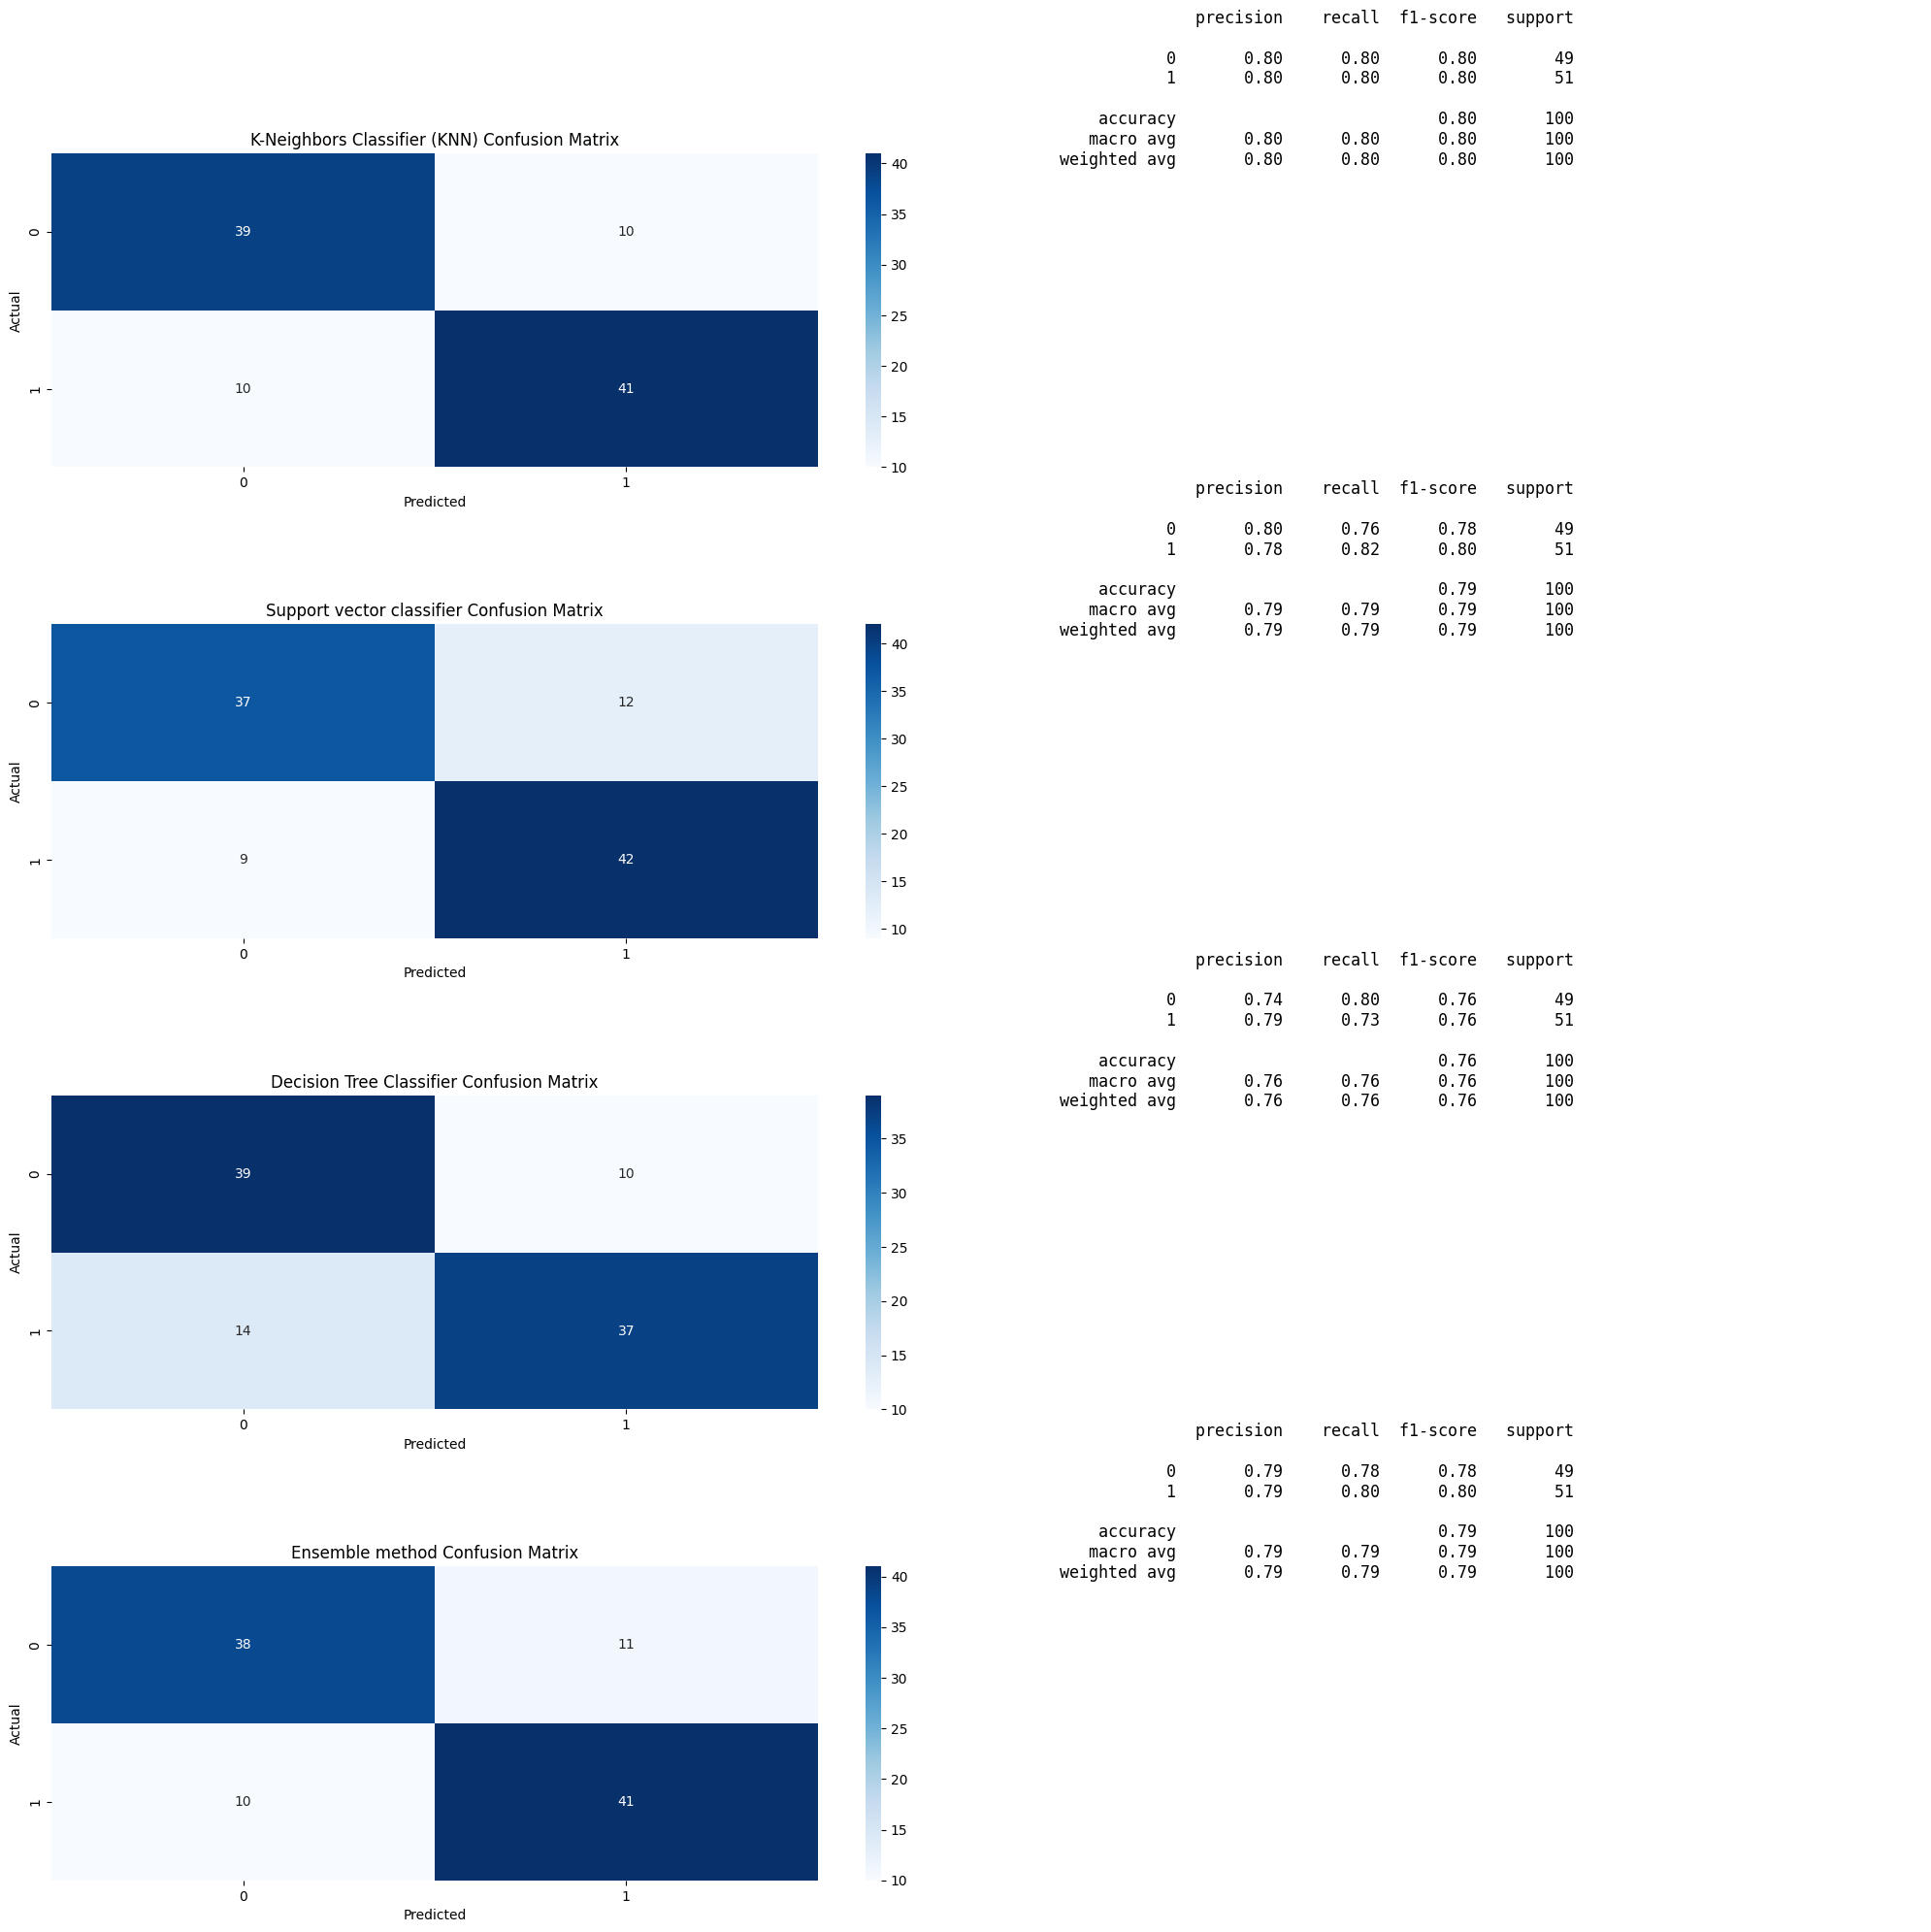

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix and classification report for each classifier in one figure
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.heatmap(CM_KN, annot=True, fmt='d', cmap='Blues', ax=axs[0,0])
axs[0,0].set_title('K-Neighbors Classifier (KNN) Confusion Matrix')
axs[0,0].set_xlabel('Predicted')
axs[0,0].set_ylabel('Actual')

#axs[0,1].set_title('KN Classification Report')
axs[0,1].text(0.1, 0.9, CR_KN1, {'fontsize': 12}, fontproperties = 'monospace')
axs[0,1].axis('off')

sns.heatmap(CM_SVC, annot=True, fmt='d', cmap='Blues', ax=axs[1,0])
axs[1,0].set_title('Support vector classifier Confusion Matrix')
axs[1,0].set_xlabel('Predicted')
axs[1,0].set_ylabel('Actual')

axs[1,1].text(0.1, 0.9, CR_SVC1, {'fontsize': 12}, fontproperties = 'monospace')
axs[1,1].axis('off')

sns.heatmap(CM_DTC, annot=True, fmt='d', cmap='Blues', ax=axs[2,0])
axs[2,0].set_title('Decision Tree Classifier Confusion Matrix')
axs[2,0].set_xlabel('Predicted')
axs[2,0].set_ylabel('Actual')

axs[2,1].text(0.1, 0.9, CR_DTC1, {'fontsize': 12}, fontproperties = 'monospace')
axs[2,1].axis('off')

sns.heatmap(CM_EM, annot=True, fmt='d', cmap='Blues', ax=axs[3,0])
axs[3,0].set_title('Ensemble method Confusion Matrix')
axs[3,0].set_xlabel('Predicted')
axs[3,0].set_ylabel('Actual')

axs[3,1].text(0.1, 0.9, CR_EM1, {'fontsize': 12}, fontproperties = 'monospace')
axs[3,1].axis('off')

plt.tight_layout()
plt.show()

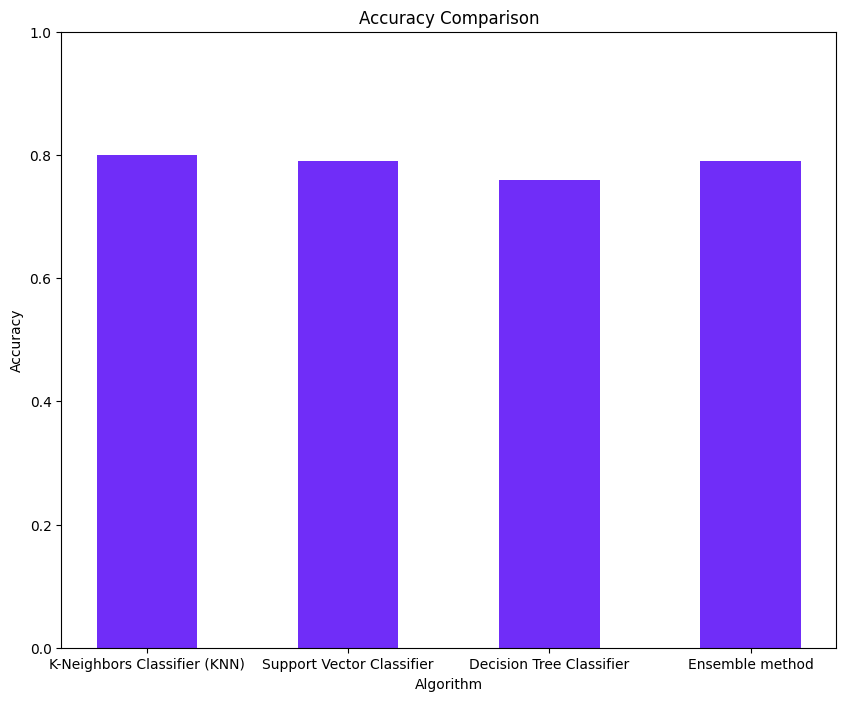

In [70]:
import matplotlib.pyplot as plt

# Example data
algorithms = ['K-Neighbors Classifier (KNN)', 'Support Vector Classifier', 'Decision Tree Classifier','Ensemble method']
accuracy = [CR_KN2, CR_SVC2,  CR_DTC2, CR_EM2]

# Set the width of each bar
bar_width = 0.5

# Calculate the x position of each group of bars
x_pos = [i for i, _ in enumerate(algorithms)]
fig, ax = plt.subplots(figsize=(10,8))


# Plot the bars for each algorithm
ax.bar(x_pos, accuracy, width=bar_width, color='#702DF8')

# Add labels and title
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')

# Add tick marks and labels for each algorithm
ax.set_xticks(x_pos)
ax.set_xticklabels(algorithms)

# Set the y-axis range
ax.set_ylim([0, 1])

plt.show()
